### Algoritmo de Busqueda Simulated Anneling

#### Solución al problema de encontrar el mínimo valor de una función objetivo

**Problema:** Utilizando el algoritmo Simulated Anneling, y ajustando los valores de x1 y x2, encontrar el minimo global de la siguiente función objetivo:

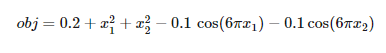

Importamos las librerias necesarias

In [ ]:
# Importar algunas otras bibliotecas que necesitaremos
# También se deben instalar los paquetes matplotlib y numpy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Definimos la función objetivo como **f**

In [ ]:
# definir la función objetivo
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj

Seleccionamos un valor de inicio que se encuentre entre -1 y 1

In [ ]:
# Ubicación de inicio aleatoria en un espacio entre 1 y -1
x_start = [0.8, -0.5]

**Espacio de busqueda:** Creamos una matriz con valores entre -1 y 1 y les aplicamos la funcion objetivo

In [ ]:
# Variables (puntos en el plano cartesiano) con valores entre 1 y -1 que cumplen con la funcion objetivo
i1 = np.arange(-1.0, 1.0, 0.01)
i2 = np.arange(-1.0, 1.0, 0.01)
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
            - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
            - 0.1*math.cos(6.0*3.1415*x2m[i][j])

Visualizamos el espacio de busqueda generado 

In [ ]:
# Crear una gráfica del espacio de busqueda
plt.figure()
# Dibujar contornos
CS = plt.contour(x1m, x2m, fm)
# Etiquetas del espacio
plt.clabel(CS, inline=1, fontsize=10)
# texto a la visualizacion
plt.title('Espacio de Busqueda')
plt.xlabel('x1')
plt.ylabel('x2')

### Codificamos el Algoritmo Simulated Anneling

**Condiciones de busqueda**

In [ ]:
# Número de ciclos
n = 50
# Número de ensayos por ciclo
m = 50
# Número de soluciones aceptadas
na = 0.0
# Probabilidad de aceptar una peor solución al principio (por lo general es de 70 a 80%)
p1 = 0.7
# Probabilidad de aceptar una peor solución al final (cercano a cero)
p50 = 0.001
# Temperatura inicial (la mas alta)
t1 = -1.0/math.log(p1)
# Final temperature (la mas baja)
t50 = -1.0/math.log(p50)
# Reducción fraccionada en cada ciclo = cuanto reduciremos la temperatura en cada ciclo
frac = (t50/t1)**(1.0/(n-1.0))

In [ ]:
##################################################
# Algoritmo Simulated Annealing
##################################################
# Inicializamos los 'n' valores de x con 0
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# mejores resultados actuales hasta ahora
xc = np.zeros(2) # Contendra las mejores soluciones
xc = x[0]  # x_start = [0.8, -0.5]
fc = f(xi) # fc contiene el valor de la funcion objetivo para el estado inicial x_start = [0.8, -0.5]
fs = np.zeros(n+1) 
fs[0] = fc # fc contiene el valor de la funcion objetivo para el estado inicial x_start = [0.8, -0.5]
# Temperatura actual
t = t1
# Promedio DeltaE
DeltaE_avg = 0.0
for i in range(n):
    print('Ciclo: ' + str(i) + ' con temperatura: ' + str(t))
    for j in range(m):
        # Genera nuevos puntos de prueba - Recordar que los puntos iniciales de prueba eran x_start = [0.8, -0.5]
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # Recortar a los límites superior e inferior
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc) #Diferencia de energias
        if (f(xi)>fc):
            # Inicializar DeltaE_avg si se encontró una solución peor
            # en la primera iteración
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # la función objetivo es peor
            # generar probabilidad de aceptación
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determinar si aceptar un punto peor
            if (random.random()<p):
                # acepta la peor solución
                accept = True
            else:
                # no aceptes la peor solución
                accept = False
        else:
            # la función objetivo es menor, aceptarla automáticamente
            accept = True
        if (accept==True):
            # actualizar la solución actualmente aceptada
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)
            # Incrementar el número de soluciones aceptadas.
            na = na + 1.0
            # actualizar DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # Registrar los mejores valores de x al final de cada ciclo
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # Bajar la temperatura para el próximo ciclo
    t = frac * t

**Visualizamos la solución encontrada**

In [ ]:
# visualizar solución
print('Mejor solución x1 y x2: ' + str(xc))
print('Mejor funcion objetivo: ' + str(fc))

plt.plot(x[:,0],x[:,1],'y-o')
plt.savefig('contour.png')

**Comparamos la funcion objetivo vs valores aceptados despues de cada ciclo**

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-') # Visualiza los valores de la funcion objetivo para cada ciclo
ax1.legend(['Objetivo'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-') # Visualiza en lineas azules mejores valores aceptados despues de cada ciclo
ax2.plot(x[:,1],'g--') # Visualiza en lineas verdes mejores valores aceptados despues de cada ciclo
ax2.legend(['x1','x2'])

# Guardamos la figura como PNG
plt.savefig('iterations.png')

plt.show()